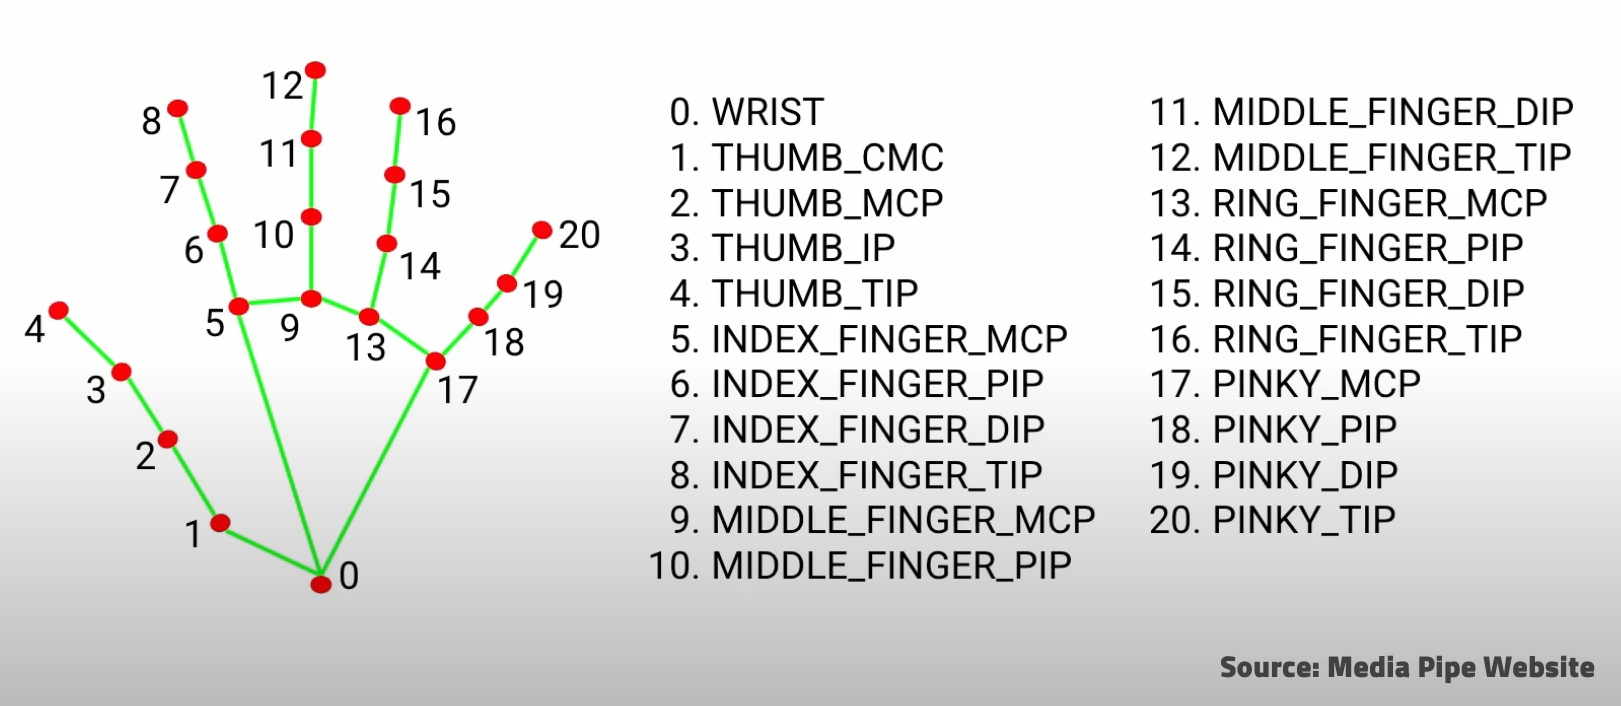

In [1]:
import cv2 # pip install opencv-python
import mediapipe as mp # pip install mediapipe
import time

In [5]:
!pip show opencv-python

Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\Users\sergi\OneDrive\Documentos\AAA_MisDocumentos\Club IA\ComputerVision\.venv\Lib\site-packages
Requires: numpy
Required-by: 


In [6]:
!pip show mediapipe

Name: mediapipe
Version: 0.10.21
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: c:\Users\sergi\OneDrive\Documentos\AAA_MisDocumentos\Club IA\ComputerVision\.venv\Lib\site-packages
Requires: absl-py, attrs, flatbuffers, jax, jaxlib, matplotlib, numpy, opencv-contrib-python, protobuf, sentencepiece, sounddevice
Required-by: 


In [7]:
!pip show pyautogui

Name: PyAutoGUI
Version: 0.9.54
Summary: PyAutoGUI lets Python control the mouse and keyboard, and other GUI automation tasks. For Windows, macOS, and Linux, on Python 3 and 2.
Home-page: https://github.com/asweigart/pyautogui
Author: Al Sweigart
Author-email: al@inventwithpython.com
License: BSD
Location: c:\Users\sergi\OneDrive\Documentos\AAA_MisDocumentos\Club IA\ComputerVision\.venv\Lib\site-packages
Requires: mouseinfo, pygetwindow, pymsgbox, pyscreeze, pytweening
Required-by: 


CODIGO BÁSICO PARA ACCEDER A LA CAMARA

In [2]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

while True:
    succes, img = cap.read()
    
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break

cap.release()
cv2.destroyAllWindows()

LE INCORPORAMOS EN HAND-TRACKING

In [2]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

mpHands = mp.solutions.hands # Accedemos al módulo 'hands' de MediaPipe
hands = mpHands.Hands() # Creamos una instancia de la clase 'hands', encargada de detectar las manos
mpDraw = mp.solutions.drawing_utils # Accedemos al módulo 'drawing_utils' de MediaPipe para pintar sobre la imagen

while True:
    succes, img = cap.read() # Captura de la camara
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convertimos la imagen de formato BGR (OpenCV) a RGB.
    result = hands.process(imgRGB) # Procesamos la imagen MediaPipe.
    #print(result.multi_hand_landmarks) # Nos da las coordenadas del resultado encontrado, en nuestro caso, la mano
    
    # Puede haber mas de una mano, por lo que las separamos para mostrarlas
    if result.multi_hand_landmarks:
        for hand in result.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS) # Con 'mpHands.HAND_CONNECTIONS' podemos ver las conexiones
    
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break

cap.release()
cv2.destroyAllWindows()

LE INCORPORAMOS UN CALCULO DE FPS PARA VER SI EL VIDEO SE VE CORRECTAMENTE

In [ ]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

previousTime = 0
currentTime = 0

while True:
    succes, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(imgRGB) 
    
    # Puede haber mas de una mano, por lo que las separamos para mostrarlas
    if result.multi_hand_landmarks:
        for hand in result.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS) # Con 'mpHands.HAND_CONNECTIONS' podemos ver las conexiones
    
    # Calculo de FPS
    currentTime = time.time()
    fps = 1/(currentTime-previousTime)
    previousTime = currentTime
    
    cv2.putText(img, "FPS: " + str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break

cap.release()
cv2.destroyAllWindows()

USO DE LOS PUNTOS DE LA MANO

In [12]:
cap = cv2.VideoCapture(0) # Conseguimos nuestra camara

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

previousTime = 0
currentTime = 0

while True:
    succes, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(imgRGB) 
    
    # Puede haber mas de una mano, por lo que las separamos para mostrarlas
    if result.multi_hand_landmarks:
        for hand in result.multi_hand_landmarks:
            for id, lm in enumerate(hand.landmark): # Nos ayudara a identificar cada uno de los puntos (landmarks)
                # Print de coordenadas de cada uno de los puntos de la mano
                print(f'id: {id}\n{lm}') 
                
                # Print de coordenadas de cada uno de los puntos de la mano en pixeles
                h, w, c = img.shape # Altura, ancho y canales de la imagen
                centerX, centerY = int(lm.x*w), int(lm.y*h)
                print(f'id: {id}\nX:{centerX} | Y:{centerY}')
                print("-----")
                # Podemos usar estas coordenadas como queramos
                # Estamos haciendo que el punto de la muñeca sea morado y mas grande
                if id == 8:
                    cv2.circle(img, (centerX, centerY), 25, (255,0,255), cv2.FILLED)
                
            mpDraw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS) # Con 'mpHands.HAND_CONNECTIONS' podemos ver las conexiones
    
    # Calculo de FPS
    currentTime = time.time()
    fps = 1/(currentTime-previousTime)
    previousTime = currentTime
    
    cv2.putText(img, "FPS: " + str(int(fps)), (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (255,0,255), 3)
    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == 27:  # Presionar 'Esc' para salir
        break

cap.release()
cv2.destroyAllWindows()

id: 0
x: 0.131867796
y: 1.04350972
z: 7.76851039e-007

id: 0
X:84 | Y:500
-----
id: 1
x: 0.201759875
y: 1.01242745
z: -0.0374200456

id: 1
X:129 | Y:485
-----
id: 2
x: 0.260083377
y: 0.960971117
z: -0.0638320148

id: 2
X:166 | Y:461
-----
id: 3
x: 0.307040334
y: 0.906901956
z: -0.0872759745

id: 3
X:196 | Y:435
-----
id: 4
x: 0.353069842
y: 0.866825461
z: -0.112336658

id: 4
X:225 | Y:416
-----
id: 5
x: 0.198335409
y: 0.836896122
z: -0.0589109175

id: 5
X:126 | Y:401
-----
id: 6
x: 0.228812009
y: 0.729082823
z: -0.0884520039

id: 6
X:146 | Y:349
-----
id: 7
x: 0.239153981
y: 0.662096381
z: -0.107522137

id: 7
X:153 | Y:317
-----
id: 8
x: 0.244164437
y: 0.607139647
z: -0.121120557

id: 8
X:156 | Y:291
-----
id: 9
x: 0.140800729
y: 0.824282825
z: -0.0610778779

id: 9
X:90 | Y:395
-----
id: 10
x: 0.137100056
y: 0.706547379
z: -0.0847837627

id: 10
X:87 | Y:339
-----
id: 11
x: 0.131096303
y: 0.628227592
z: -0.102500238

id: 11
X:83 | Y:301
-----
id: 12
x: 0.122208506
y: 0.567065716
z: -0.1